In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

* Normalizationis a tecnique often applied as part of data preparation for machine learning.
* the gole of normalization is to change the value of numeric columns in the dataset to use a common scale.
* whitout disorting differences in the ranges of value or 

In [2]:
df=pd.read_csv('wine.csv',header=None,usecols=[0,1,2])
df

,0,1,2
0,Wine,Alcohol,Malic.acid
1,1,14.23,1.71
2,1,13.2,1.78
3,1,13.16,2.36
4,1,14.37,1.95
...,...,...,...
174,3,13.71,5.65
175,3,13.4,3.91
176,3,13.27,4.28
177,3,13.17,2.59


In [3]:
df.columns=['class label','Alcohol','Malic acid']

In [4]:
df

,class label,Alcohol,Malic acid
0,Wine,Alcohol,Malic.acid
1,1,14.23,1.71
2,1,13.2,1.78
3,1,13.16,2.36
4,1,14.37,1.95
...,...,...,...
174,3,13.71,5.65
175,3,13.4,3.91
176,3,13.27,4.28
177,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

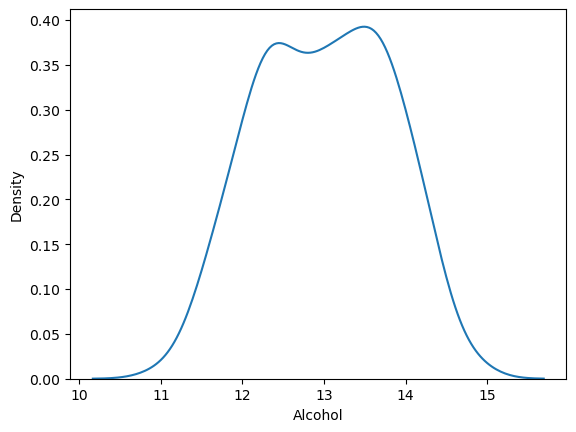

In [5]:
df['Alcohol'] = pd.to_numeric(df['Alcohol'], errors='coerce')
sns.kdeplot(df['Alcohol'].dropna())

* pd.to_numeric(..., errors='coerce') converts values to numbers and turns any non-convertible ones into NaN.
* .dropna() removes those NaN values before plotting.

<Axes: xlabel='Malic acid', ylabel='Density'>

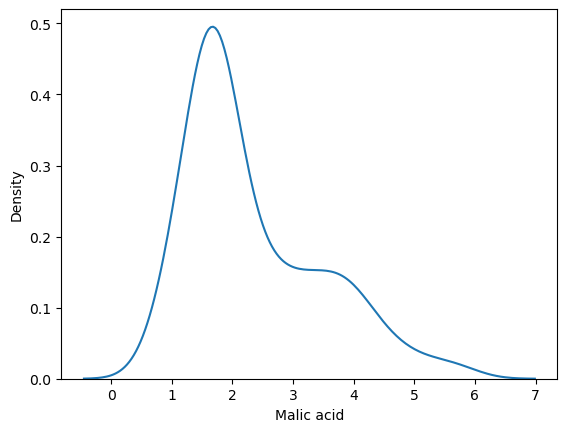

In [6]:
df['Malic acid'] = pd.to_numeric(df['Malic acid'], errors='coerce')
sns.kdeplot(df['Malic acid'].dropna())

<Axes: xlabel='class label', ylabel='Density'>

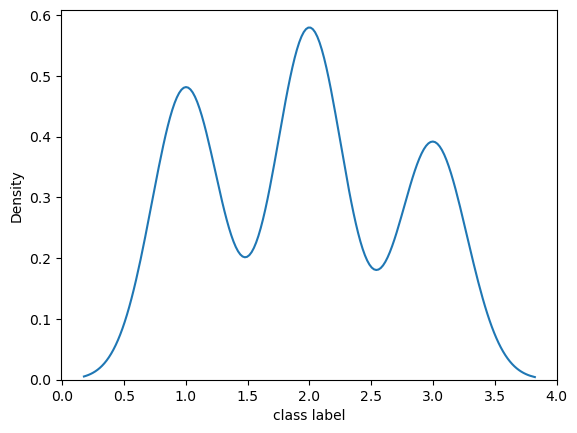

In [7]:
df['class label'] = pd.to_numeric(df['class label'], errors='coerce')
sns.kdeplot(df['class label'].dropna())

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

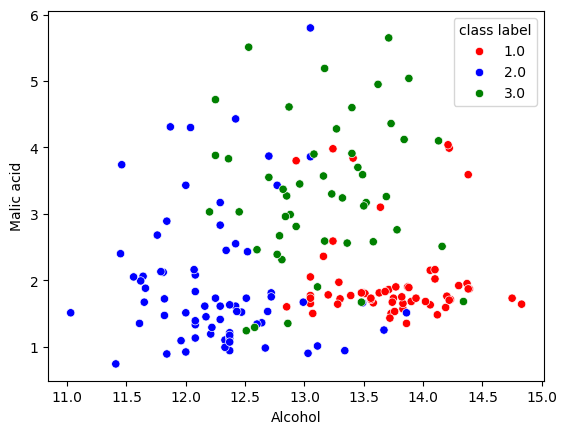

In [8]:
color_dict={1:'red',2:'blue',3:'green'}
sns.scatterplot(x=df['Alcohol'], y=df['Malic acid'], hue=df['class label'], palette=color_dict)


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('class label',axis=1),
                                              df['class label'],
                                              test_size=0.3,
                                              random_state=0)

In [10]:
x_train

,Alcohol,Malic acid
40,14.22,3.99
126,12.07,2.16
22,12.93,3.80
74,12.99,1.67
83,12.08,1.13
...,...,...
103,12.34,2.45
67,13.11,1.01
117,11.82,1.47
47,14.38,3.59


In [11]:
x_train.shape,x_test.shape

((125, 2), (54, 2))

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()

# fit the scaler to the train set , it will learn the parameter
scaler.fit(x_train)

# transform train and test sets
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [13]:
x_train_scaled

array([[0.83947368, 0.66191446],
       [0.27368421, 0.2892057 ],
       [0.5       , 0.62321792],
       [0.51578947, 0.18940937],
       [0.27631579, 0.07942974],
       [0.64736842, 0.58044807],
       [0.87105263, 0.19144603],
       [0.16052632, 0.2688391 ],
       [0.56315789, 0.90631365],
       [0.62105263, 0.20977597],
       [0.15263158, 0.12423625],
       [0.33157895, 0.13645621],
       [0.11052632, 0.33808554],
       [0.47894737, 0.51527495],
       [0.42368421, 0.12627291],
       [0.57105263, 0.21181263],
       [0.70789474, 0.14052953],
       [0.37894737, 0.15885947],
       [0.20526316, 0.28105906],
       [0.75      , 0.23421589],
       [0.74473684, 0.12423625],
       [0.43684211, 0.16089613],
       [0.64736842, 0.18737271],
       [0.81578947, 0.68431772],
       [0.64473684, 0.18940937],
       [0.11315789, 0.61099796],
       [0.20789474, 0.19959267],
       [0.25526316, 0.15682281],
       [0.5       , 0.42158859],
       [0.30789474, 0.46639511],
       [0.

* to handel this numpy array convert to pandas dataframe

In [14]:
x_train_scaled= pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [15]:
np.round(x_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.3
std,0.9,1.1
min,11.0,0.7
25%,12.3,1.5
50%,13.0,1.8
75%,13.7,3.0
max,14.8,5.6


In [16]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


Text(0.5, 1.0, 'After Scalling')

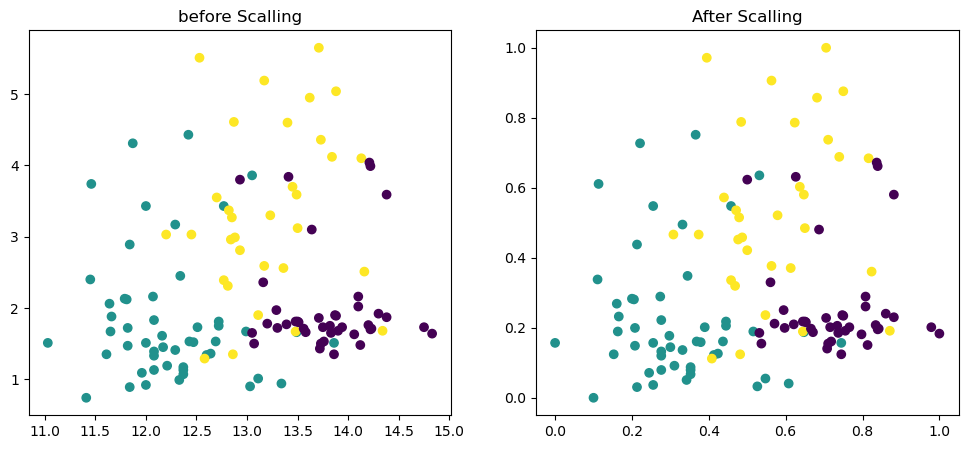

In [18]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(x_train['Alcohol'],x_train['Malic acid'],c=y_train)
ax1.set_title('before Scalling')
ax2.scatter(x_train_scaled['Alcohol'],x_train_scaled['Malic acid'],c=y_train)
ax2.set_title('After Scalling')

<Axes: title={'center': 'Before Scaling'}, xlabel='Alcohol', ylabel='Density'>

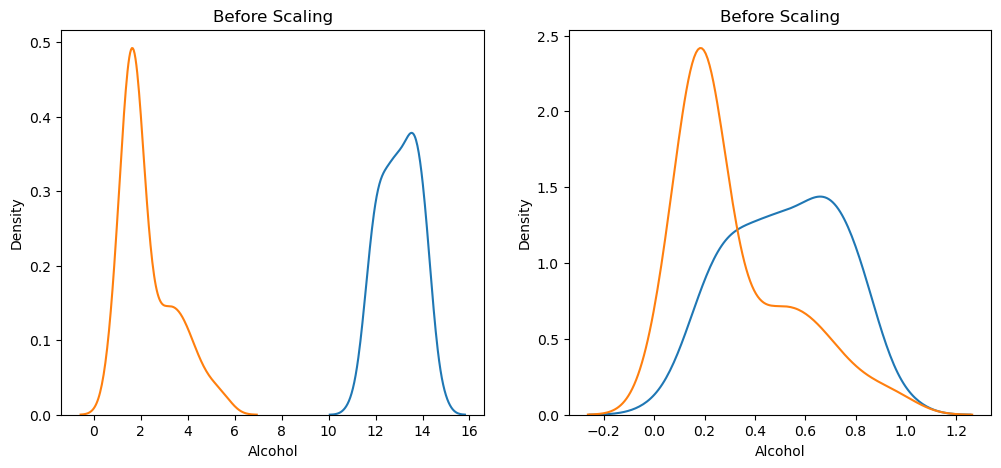

In [21]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))

# before scalling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'],ax=ax1)
sns.kdeplot(x_train['Malic acid'],ax=ax1)

#after scalling
ax2.set_title('Before Scaling')
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(x_train_scaled['Malic acid'],ax=ax2)

<Axes: title={'center': 'Before Scaling'}, xlabel='Alcohol', ylabel='Density'>

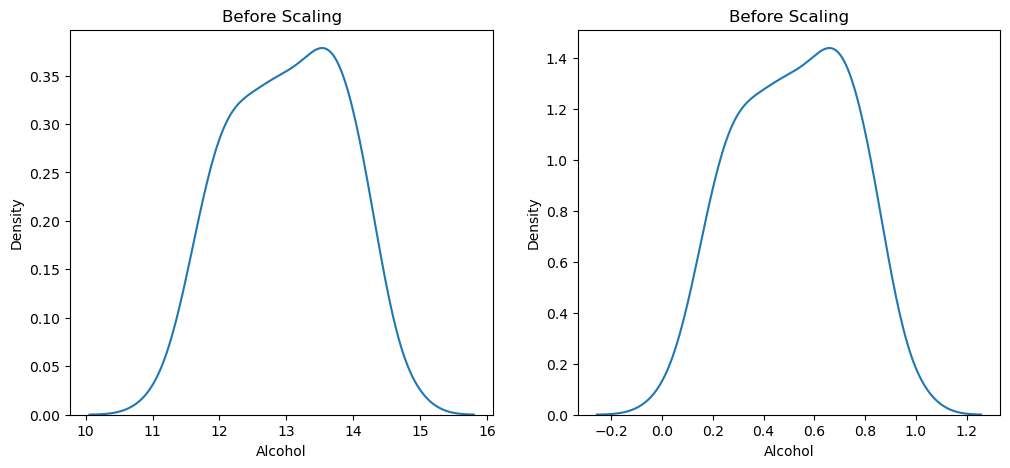

In [22]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))

# before scalling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'],ax=ax1)

#after scalling
ax2.set_title('Before Scaling')
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)

<Axes: title={'center': 'Before Scaling'}, xlabel='Malic acid', ylabel='Density'>

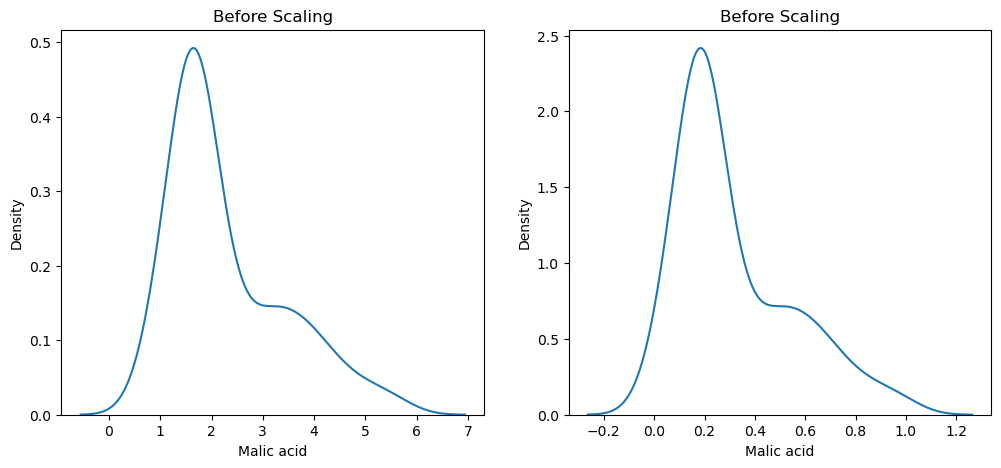

In [23]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))

# before scalling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Malic acid'],ax=ax1)

#after scalling
ax2.set_title('Before Scaling')
sns.kdeplot(x_train_scaled['Malic acid'],ax=ax2)